In [69]:
import pandas as pd
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
import numpy as np
import scipy.stats as stat
from scipy.stats import shapiro
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [70]:
data=pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df=data.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
X = df.drop("sales", axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
training = df.copy()
print(training.shape)

(160, 3)
(160,)
(40, 3)
(40,)
(200, 4)


In [72]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2918.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                   2.02e-137
Time:                        15:58:25   Log-Likelihood:                         -336.58
No. Observations:                 160   AIC:                                      679.2
Df Residuals:                     157   BIC:                                      688.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0541      0.001     37.180      0.000       0.051       0.057
radio          0.2245      0.011     21.232      0.000       0.204       0.245
newspaper      0.0126      0.007      1.725      0.086      -0.002       0.027
==============================================================================
Omnibus:                        0.436   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.318
Skew:                           0.109   Prob(JB):                        0.853
Kurtosis:                       3.015   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0541,0.001,37.180,0.000,0.051,0.057
radio,0.2245,0.011,21.232,0.000,0.204,0.245
newspaper,0.0126,0.007,1.725,0.086,-0.002,0.027


In [74]:
influence=model.get_influence()
influence

Leverange v.s studentized Residuals


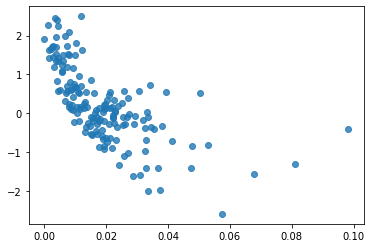

In [75]:
"""outlierları detect etmek için yapıyıruz bu kısmı, aynı zamanda
modelde sıkıntı var mı normalden gelip gelmiyor mu diye bakmanında bir yolu çünkü eğer normal dağılımdan gelmiyorsa 
verilerin çoğu outlier görünür, erorlerin normal 
dağılımdan gelmesi de önemli aynı ona da bakıyor aslında erordeki outlierlara bakmak için yapılıyor denmesi daha doğru"""
resid_student=influence.resid_studentized_external 
(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage=influence.hat_matrix_diag
print("Leverange v.s studentized Residuals")
sns.regplot(leverage, model.resid_pearson,fit_reg=False)

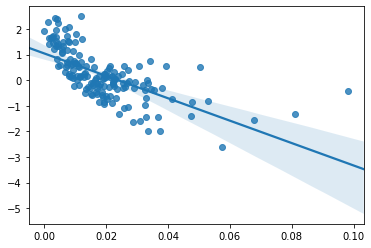

In [76]:
sns.regplot(leverage, model.resid_pearson,fit_reg=True) ## line fit edip daha da iyi anlayabiliriz outllierları

In [77]:
advres=pd.concat([data, pd.Series(model.resid, name="resid"),pd.Series(model.predict(), name="predict")], axis=1)
model.predict()

array([17.56588912,  6.43104187, 16.08357395, 14.52156918, 19.38232174,
       15.90143213, 12.94476928, 12.85959203,  9.16454479, 18.20801748,
       17.03342898, 19.93320285,  7.69467654, 14.77293396, 17.06021145,
        2.2993203 ,  9.99668689,  9.0186749 ,  4.90735948, 17.205426  ,
       26.12365105,  6.58691837, 15.79144833, 11.48783561, 13.62910847,
       10.92380966, 14.29034693,  5.9748658 , 11.25463249, 13.78662936,
        9.71218718,  9.48589509, 19.16267779,  8.40014992, 24.41794736,
       25.82143333,  8.48643944,  7.63515075, 19.98542592, 21.46853063,
       22.68400882,  9.09363651, 11.69451987, 16.59852707,  5.54199246,
       22.13406542, 25.46115228, 21.93327104,  6.30081059, 10.87013423,
       14.24583825, 15.54607759, 22.0535171 , 11.74921214, 21.57340359,
        3.07176784, 20.66115119, 12.10699132, 24.34384623,  1.12041225,
       12.96611131, 16.10492353,  4.50092287, 19.83939038, 14.1920059 ,
       24.72209947, 13.31923333, 13.09975507,  6.46165117, 20.99

In [78]:
model.resid

41    -0.465889
24     3.268958
118   -0.183574
165   -2.621569
141   -0.182322
87     0.098568
4     -0.044769
122   -1.259592
180    1.335455
3      0.291983
27    -1.133429
109   -0.133203
125    2.905323
110   -1.372934
11     0.339789
91     5.000680
12    -0.796687
144    2.381325
22     0.692641
163    0.794574
183    0.076349
191    3.313082
178   -3.991448
134   -0.687836
100   -1.929108
67     2.476190
21    -1.790347
32     3.625134
148   -0.354632
160    0.613371
         ...   
97     0.500324
107    3.448040
149    1.629028
187    0.283622
157    1.394461
154    0.577890
86     1.494647
60     4.486303
126   -3.191660
182    4.005178
153    0.340706
88     1.473246
89    -0.621084
186    1.943481
193    1.096154
8      3.850436
85    -0.214024
74    -0.238848
73     2.322868
168   -0.581470
179    1.170024
25    -3.261152
35    -3.962490
43    -0.516773
0      0.288920
106    3.004017
136   -0.758903
62    -1.075959
9     -1.064916
162    0.316778
Length: 160, dtype: floa

In [79]:
advres.head()

,TV,radio,newspaper,sales,resid,predict
0,230.1,37.8,69.2,22.1,0.288920,17.565889
1,44.5,39.3,45.1,10.4,-1.398914,6.431042
2,17.2,45.9,69.3,9.3,-2.806991,16.083574
3,151.5,41.3,58.5,18.5,0.291983,14.521569
4,180.8,10.8,58.4,12.9,-0.044769,19.382322


C:\Users\eadem\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\eadem\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


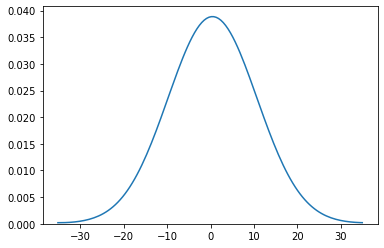

In [80]:
sns.kdeplot(np.array(advres.resid), bw=10)#gaussiandan gelen residualların normaldden gelince nasıl olması gerektiğini gösteriyo

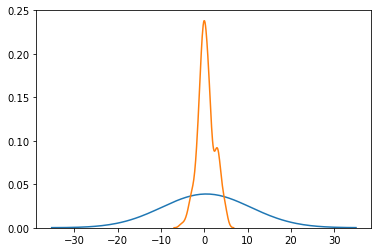

In [81]:
sns.kdeplot(np.array(advres.resid), bw=10)
sns.distplot(np.array(advres.resid), hist=False) #burada normalde olması gerekn ve olanı üst üste koyarak farkı görüyoruz

C:\Users\eadem\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\eadem\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\eadem\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


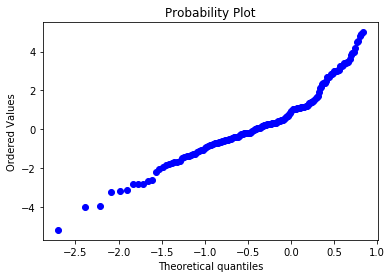

In [82]:
stats.probplot(advres.resid, dist="norm",plot=pylab)
pylab.show()

In [83]:
advres=advres.dropna()
advres

,TV,radio,newspaper,sales,resid,predict
0,230.1,37.8,69.2,22.1,0.288920,17.565889
1,44.5,39.3,45.1,10.4,-1.398914,6.431042
2,17.2,45.9,69.3,9.3,-2.806991,16.083574
3,151.5,41.3,58.5,18.5,0.291983,14.521569
4,180.8,10.8,58.4,12.9,-0.044769,19.382322
5,8.7,48.9,75.0,7.2,-5.192056,15.901432
7,120.2,19.6,11.6,13.2,2.147395,12.859592
8,8.6,2.1,1.0,4.8,3.850436,9.164545
9,199.8,2.6,21.2,10.6,-1.064916,18.208017
10,66.1,5.8,24.2,8.6,3.415928,17.033429


In [84]:
stat, p = shapiro (advres.resid.dropna())

In [85]:
advres = advres.dropna()

stat,p=shapiro(advres.resid)

print('Statictics=%.3f, p=%.3f' %(stat,p))

alpha=0.5
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)')

Statictics=0.981, p=0.061
Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)


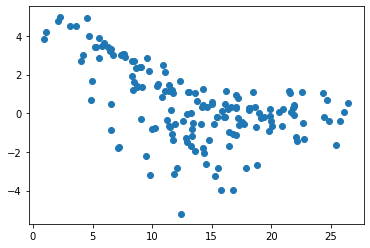

In [86]:
resid=model.resid
plt.scatter(model.predict(),resid)

In [87]:
lm=smf.ols("sales~TV+newspaper+radio", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        15:58:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
y,X=dmatrices("sales~radio+TV+newspaper", data= df, return_type="dataframe")
vlf=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vlf

[6.848899953334954, 1.1449519171055353, 1.0046107849396502, 1.1451873787239288]

In [89]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model.intercept_
model.coef_

array([ 0.04528233,  0.19068637, -0.0064602 ])

In [90]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
model.predict(yeni_veri)

array([6.1585976])

In [91]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.580389403313308

In [92]:
testrmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
testrmse

2.00132661332328

In [93]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
model.score(X_train, y_train)
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
train_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")).mean()
test_rmse = np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()
print("Train RMSE: %.3f" %  train_rmse)
print("Test RMSE : %.3f" %  test_rmse)

Train RMSE: 1.625
Test RMSE : 1.977


In [94]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [96]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [97]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [98]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [99]:
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [100]:
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
trainig = df.copy()
print("training", training.shape)

X_train (238, 19)
y_train (238,)
X_test (25, 19)
y_test (25,)
training (200, 4)


In [102]:
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[:1,:]

array([[-1.10032314,  0.16383937, -1.60753199, -0.15408075,  1.11036566,
         1.57539126, -0.13368518, -0.02910511,  0.46226426,  0.09054496,
         0.06356351, -0.01330673,  0.1514916 , -0.13132764, -0.20377169,
         0.10636985, -0.04471521,  0.01783426, -0.00658631]])

In [103]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[:5]

array([38.4 , 60.38, 71.24, 79.36, 84.65])

In [109]:
pcr_model = lm.fit(X_reduced_train, y_train)
pcr_model.intercept_

538.6701974789917

In [110]:
pcr_model.coef_

array([ 109.02615801,  -22.30543418,   29.91314696,  -30.96349889,
        -65.83317835,   61.99039764,   30.3742456 ,   22.88691288,
         31.51255649,  105.73354873,  -45.97512035,   18.0575466 ,
         32.69244464, -248.69884699, -124.3882493 ,  462.27880875,
       -344.2779742 , -634.68726268, -147.56096081])

In [105]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:5]

array([529.72804802,  46.45817304, 695.47125806, 236.59300585,
       187.62217431])

In [106]:
np.sqrt(mean_squared_error(y_train, y_pred))

309.0697459849272

In [107]:
df["Salary"].mean()

535.9258821292775